In [1]:
import librosa
import librosa.display
import numpy as np
import matplotlib.pyplot as plt
import IPython.display
import time

In [2]:
data, sr = librosa.load('/Users/patrickfuller/Downloads/Led Zeppelin - Stairway To Heaven.mp3')

In [3]:
data.shape, sr

((10594368,), 22050)

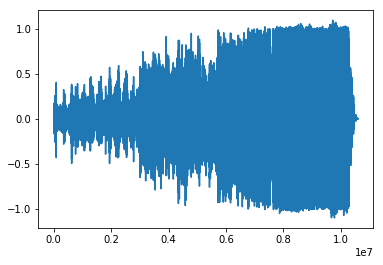

In [4]:
plt.plot(data);

In [5]:
first_thirty_seconds = librosa.time_to_samples(30, sr=sr)
intro = data[:first_thirty_seconds]

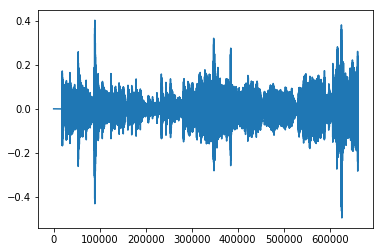

In [6]:
plt.plot(intro)

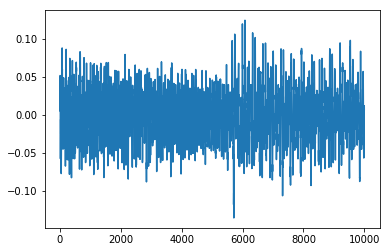

In [8]:
plt.plot(intro[100_000:110_000])

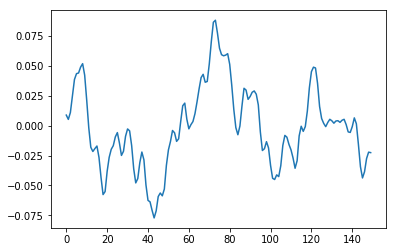

In [11]:
plt.plot(intro[100_000:100_150])

In [9]:
spec = librosa.feature.melspectrogram(data, sr=sr)

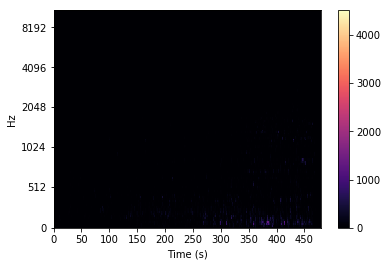

In [10]:
librosa.display.specshow(spec,x_axis='s', y_axis='mel', sr=sr)
plt.colorbar();

In [11]:
db_spec = librosa.power_to_db(spec,ref=np.max)

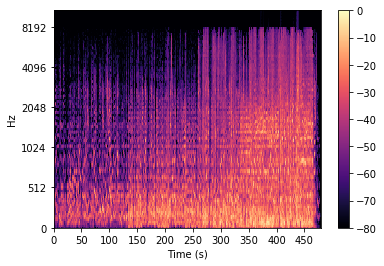

In [12]:
librosa.display.specshow(db_spec,x_axis='s', y_axis='mel', sr=sr)
plt.colorbar();

In [13]:
data_h, data_p = librosa.effects.hpss(data)

In [14]:
spec_h = librosa.feature.melspectrogram(data_h, sr=sr)
spec_p = librosa.feature.melspectrogram(data_p, sr=sr)
db_spec_h = librosa.power_to_db(spec_h,ref=np.max)
db_spec_p = librosa.power_to_db(spec_p,ref=np.max)

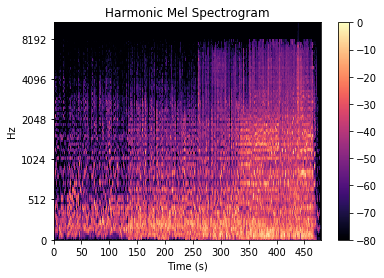

In [15]:
librosa.display.specshow(db_spec_h,x_axis='s', y_axis='mel', sr=sr)
plt.title('Harmonic Mel Spectrogram')
plt.colorbar();

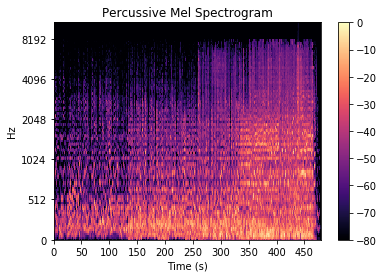

In [16]:
librosa.display.specshow(db_spec_h,x_axis='s', y_axis='mel', sr=sr)
plt.title('Percussive Mel Spectrogram')
plt.colorbar();

In [17]:
chroma = librosa.feature.chroma_cqt(data, sr=sr,)

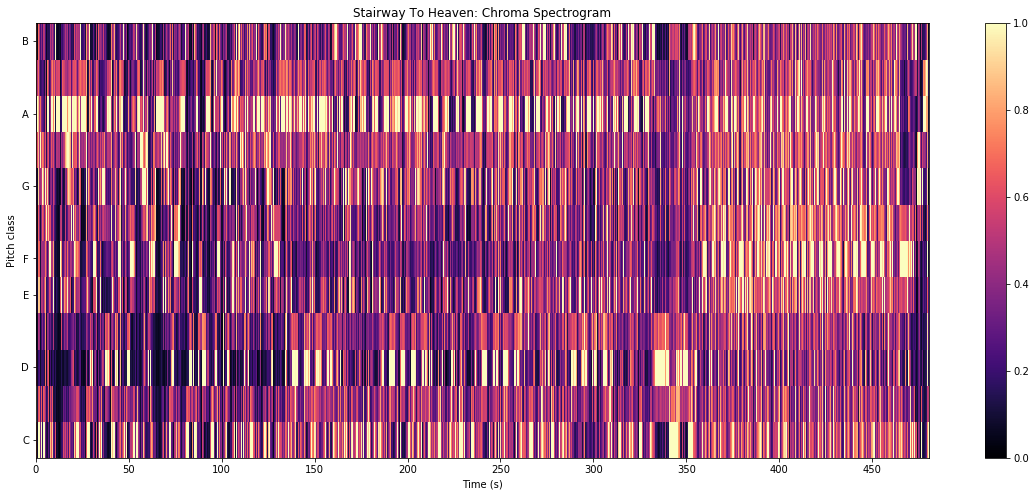

In [18]:
plt.figure(figsize=(20,8))
plt.title('Stairway To Heaven: Chroma Spectrogram')
librosa.display.specshow(chroma, sr=sr, x_axis='s', y_axis='chroma', )
plt.colorbar();

In [19]:
librosa.beat.tempo(data,sr=sr)

array([139.67483108])

In [20]:
intro_harm = librosa.effects.harmonic(intro)

In [21]:
intro_chroma = librosa.feature.chroma_cqt(intro_harm, sr=sr)

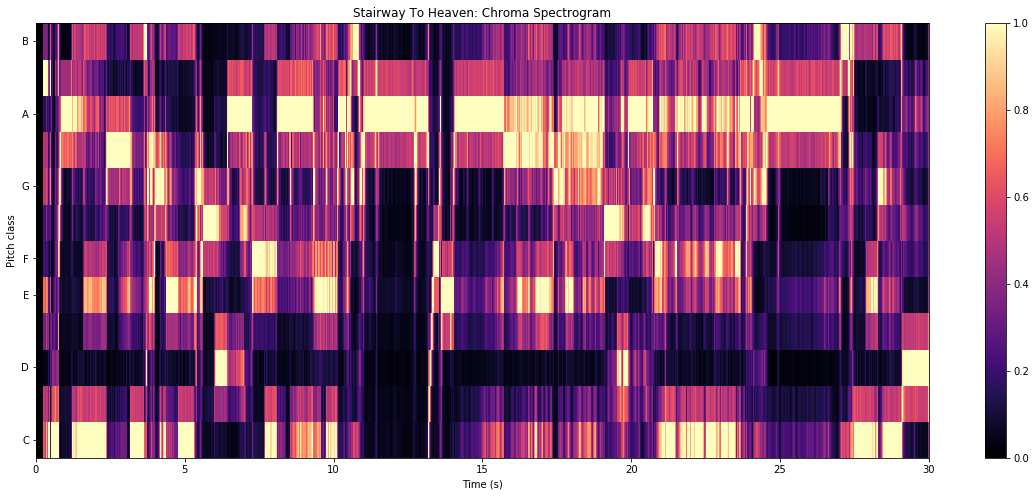

In [22]:
plt.figure(figsize=(20,8))
plt.title('Stairway To Heaven: Chroma Spectrogram')
librosa.display.specshow(intro_chroma, sr=sr, x_axis='s', y_axis='chroma', )
plt.colorbar();

In [2]:
start = time.clock()
test_array_default, _ = librosa.load('/Users/patrickfuller/Downloads/Led Zeppelin - Stairway To Heaven.mp3')
print(time.clock()-start)

15.907617000000002


In [3]:
start = time.clock()
test_array_default, _ = librosa.load('/Users/patrickfuller/Downloads/Led Zeppelin - Stairway To Heaven.mp3', res_type='kaiser_fast')
print(time.clock()-start)

4.631903000000001


In [27]:
start = time.clock()
test_array_default, _ = librosa.load('/Users/patrickfuller/Downloads/Led Zeppelin - Stairway To Heaven.mp3', res_type='scipy')
print(time.clock()-start)

85.25614200000001


In [30]:
# New Sample Rate
start = time.clock()
test_array_default, _ = librosa.load('/Users/patrickfuller/Downloads/Led Zeppelin - Stairway To Heaven.mp3', sr=11000)
print(time.clock()-start)

14.952036999999962


In [28]:
start = time.clock()
test_array_default, _ = librosa.load('/Users/patrickfuller/Downloads/Led Zeppelin - Stairway To Heaven.mp3', sr=11000, res_type='kaiser_fast')
print(time.clock()-start)

4.85173199999997


In [29]:
start = time.clock()
test_array_default, _ = librosa.load('/Users/patrickfuller/Downloads/Led Zeppelin - Stairway To Heaven.mp3', sr=11000, res_type='scipy')
print(time.clock()-start)

67.18233999999995


In [ ]:
# Native Sample Rate

In [31]:
start = time.clock()
test_array_default, _ = librosa.load('/Users/patrickfuller/Downloads/Led Zeppelin - Stairway To Heaven.mp3', sr=None)
print(time.clock()-start)

1.360262999999975


In [4]:
datanative, srnative = librosa.load('/Users/patrickfuller/Downloads/Led Zeppelin - Stairway To Heaven.mp3', sr=None)
data22, sr22 = librosa.load('/Users/patrickfuller/Downloads/Led Zeppelin - Stairway To Heaven.mp3')
data11, sr11 = librosa.load('/Users/patrickfuller/Downloads/Led Zeppelin - Stairway To Heaven.mp3', sr=11_000)

In [6]:
first_thirty_seconds=librosa.time_to_samples(30, sr=srnative)
IPython.display.Audio(datanative[:first_thirty_seconds], rate=srnative)

In [7]:
first_thirty_seconds22=librosa.time_to_samples(30, sr=sr22)
IPython.display.Audio(data22[:first_thirty_seconds22], rate=sr22)

In [8]:
first_thirty_seconds11=librosa.time_to_samples(30, sr=sr11)
IPython.display.Audio(data11[:first_thirty_seconds11], rate=sr11)

In [9]:
datanative.shape

(21188736,)

In [10]:
data22.shape

(10594368,)

In [11]:
data11.shape

(5285173,)

In [12]:
start = time.clock()
librosa.feature.melspectrogram(datanative, srnative)
print(time.clock()-start)

3.9687509999999975


In [13]:
start = time.clock()
librosa.feature.melspectrogram(data11, sr11)
print(time.clock()-start)

1.56944399999999
